# IBM Capstone Project

### Optimal Location for EV Service in the Washington State.

# Inroduction


<span style='font-family:Helvetica'>Due to the growing population of electric and hybrid vehicles in the US, the new market emerging in the field of auto service. Followed by the Tesla Motors, world top carmakers offering more electric vehicles in their model line which constantly takes a significant portion of the car market in the US. 
 
<span style='font-family:Helvetica'>The growing number of electric vehicles collaterally boosts the EV charging market, as more consumers decide to purchase electric cars as higher demand for charging stations. On the other hand, the wider access to charging stations at specific locations stimulates consumers to choose an electric vehicle.
 
<span style='font-family:Helvetica'>It is obvious that any vehicle with electric drivetrain requires maintenance and replacement services distinct from traditional gasoline vehicle, thus, a significant number of EV on the roads creates a market for “non-traditional” auto service.
 
<span style='font-family:Helvetica'>Based on market opportunity analysis, potential auto service business planning to step into the EV market and provide maintenance and replacement services in the state of Washington, however choosing the most efficient deployment locations for EV service facilities that would maximize profits requires location-based data analysis and the estimated market growth. Following data analysis will help to visualize the potential EV service market as well as clustering potential customers into groups and define the most efficient deployment locations that would satisfy the EV owner’s needs. 

# Data

#### <span style='font-family:Helvetica'>Following data required to perform the analysis:
 
<span style='font-family:Helvetica'>1. List of zip codes that covers the state of Washington (WA) including geolocation and county.<br>
<span style='font-family:Helvetica'>2. The geographical location of currently registered EV vehicles in WA will be obtained directly from (data.wa.gov), official state government site.<br>
<span style='font-family:Helvetica'>3. The geographical location of EV charging stations in WA will be obtained from National Renewable Energy Laboratory (NREL) through an API.<br>

### Importing required libraries 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

# Uploading Wasington State zip code population data

In [2]:
# The code was removed by Watson Studio for sharing.

Unnamed: 0    Zip         City State   Latitude  Longitude Population  \
0           0  98001       Auburn    WA  47.303722 -122.26608     31,911   
1           1  98002       Auburn    WA  47.304221 -122.21602     31,647   
2           2  98003  Federal Way    WA  47.311072 -122.31188     44,151   
3           3  98004     Bellevue    WA  47.618371 -122.20308     27,946   
4           4  98005     Bellevue    WA  47.611021 -122.16858     17,714   

    Density  
0  1,716.68  
1  4,423.38  
2  3,800.35  
3  3,976.84  
4  2,361.29

In [3]:
df_zip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 8 columns):
Unnamed: 0    737 non-null int64
Zip           737 non-null int64
City          737 non-null object
State         737 non-null object
Latitude      737 non-null float64
Longitude     737 non-null float64
Population    737 non-null object
Density       737 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 46.1+ KB


<span style='font-family:Helvetica'>Converting Population and Density columns into an integer and float format.

In [4]:
df_zip["Population"] = df_zip["Population"].str.replace(',', '').astype(str).astype(int) 
df_zip["Density"] = df_zip["Density"].str.replace(',', '').astype(str).astype(float)
print(df_zip.dtypes)

Unnamed: 0      int64
Zip             int64
City           object
State          object
Latitude      float64
Longitude     float64
Population      int64
Density       float64
dtype: object


# Methodology

The process will take 3 stages:
1.	Cleaning and data preparation.
2.	Transformation of the EV data and merging with EV charging station data, population, and population density data.
3.	Applying K-clustering.
4.	Visualizing data with folium. 


<span style='font-family:Helvetica'>After data was cleaned and prepared for analysis, we created a list of 586 zip codes located in the state of Washington. The data frame accompanied by associated city, total population, population density, and geo-coordinates (latitude and longitude).

In [5]:
df_zip_clean = df_zip[df_zip.Population != 0]
df_zip_clean.head()

Unnamed: 0    Zip         City State   Latitude  Longitude  Population  \
0           0  98001       Auburn    WA  47.303722 -122.26608       31911   
1           1  98002       Auburn    WA  47.304221 -122.21602       31647   
2           2  98003  Federal Way    WA  47.311072 -122.31188       44151   
3           3  98004     Bellevue    WA  47.618371 -122.20308       27946   
4           4  98005     Bellevue    WA  47.611021 -122.16858       17714   

   Density  
0  1716.68  
1  4423.38  
2  3800.35  
3  3976.84  
4  2361.29

In [6]:
df_zip_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 735
Data columns (total 8 columns):
Unnamed: 0    586 non-null int64
Zip           586 non-null int64
City          586 non-null object
State         586 non-null object
Latitude      586 non-null float64
Longitude     586 non-null float64
Population    586 non-null int64
Density       586 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 41.2+ KB


<span style='font-family:Helvetica'>Create Washington State Map.

In [8]:
address = 'WA'

geolocator = Nominatim(user_agent="WA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Washington are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Washington are 47.2868352, -120.2126139.


Adding markers to the map, symbolizing each zip code in the Washington State.

In [9]:
map_wa_zip = folium.Map(location=[latitude, longitude], zoom_start=8)

# adding markers to map
for Latitude, Longitude, City, Zip, Population in zip(df_zip_clean['Latitude'], df_zip_clean['Longitude'], df_zip_clean['City'], df_zip_clean['Zip'], df_zip_clean['Population']):
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=1.8,
        popup = ('City: ' + str(City) + '<br>'
                 'Zip: ' + str(Zip) + '<br>'
                 'Population: ' + str(Population) + '<br>'
                ), parse_html=True,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
        ).add_to(map_wa_zip)
    
map_wa_zip

# Uploading WA electric vehicle data 

In [10]:
body = client_034ad171c3624c2cb60b9aa12a9848d1.get_object(Bucket='capstoneproject-donotdelete-pr-sbxct2rwx8xdbj',Key='EV_WA_data.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ev = pd.read_csv(body)
df_ev.head()

VIN    County       City State    ZIP  Year       Make    Model  \
0  1N4BZ0CP3H    Pierce     Tacoma    WA  98446  2017     NISSAN     LEAF   
1  1G1FW6S0XH    Pierce        Roy    WA  98580  2017  CHEVROLET     BOLT   
2  5YJ3E1EB0K      King   Kirkland    WA  98034  2019      TESLA  MODEL 3   
3  1G1FW6S03J  Thurston    Olympia    WA  98512  2018  CHEVROLET     BOLT   
4  5YJ3E1ECXL      King  Sammamish    WA  98075  2020      TESLA  MODEL 3   

                          EV_type  Range   MSRP  Vehicle_ID  \
0  Battery Electric Vehicle (BEV)    107  30680   306555630   
1  Battery Electric Vehicle (BEV)    238  37495   244682707   
2  Battery Electric Vehicle (BEV)    220  35000   289500389   
3  Battery Electric Vehicle (BEV)    238  37495   338753355   
4  Battery Electric Vehicle (BEV)    308      0     1867155   

                Vehicle_Location  
0   POINT (-122.373626 47.13139)  
1  POINT (-122.471983 46.953968)  
2  POINT (-122.204248 47.719278)  
3   POINT (-123.020941 46.96755)  
4  POINT (-122.028168 47.586173)

<span style='font-family:Helvetica'>Split coordinates in the column "Vehicle_Location" to two separate columns representing LATITUDE and LONGITUDE.

In [11]:
df_ev['Vehicle_Location'] = df_ev['Vehicle_Location'].str.replace('POINT', '')
df_ev['Vehicle_Location'] = df_ev['Vehicle_Location'].str.replace('(', '')
df_ev['Vehicle_Location'] = df_ev['Vehicle_Location'].str.replace(')', '')

In [12]:
df_new = df_ev["Vehicle_Location"].str.split(" ", expand = True)

df_ev["Latitude"]= df_new[2]
df_ev["Longitude"]= df_new[1] 

df_ev.drop(columns =["Vehicle_Location"], inplace = True)

In [13]:
df_ev['Longitude'] = df_ev['Longitude'].astype(float)
df_ev['Latitude'] = df_ev['Latitude'].astype(float)

<span style='font-family:Helvetica'>Filtering the data, leaving only necessary columns.

In [14]:
df_ev1 = df_ev.filter(["VIN", "ZIP", "City", "County", "State", "Year", "Make", "Model", "Range", "Latitude", "Longitude"])
df_ev1.head()

VIN    ZIP       City    County State  Year       Make    Model  \
0  1N4BZ0CP3H  98446     Tacoma    Pierce    WA  2017     NISSAN     LEAF   
1  1G1FW6S0XH  98580        Roy    Pierce    WA  2017  CHEVROLET     BOLT   
2  5YJ3E1EB0K  98034   Kirkland      King    WA  2019      TESLA  MODEL 3   
3  1G1FW6S03J  98512    Olympia  Thurston    WA  2018  CHEVROLET     BOLT   
4  5YJ3E1ECXL  98075  Sammamish      King    WA  2020      TESLA  MODEL 3   

   Range   Latitude   Longitude  
0    107  47.131390 -122.373626  
1    238  46.953968 -122.471983  
2    220  47.719278 -122.204248  
3    238  46.967550 -123.020941  
4    308  47.586173 -122.028168

In [15]:
df_ev1.rename(columns={'ZIP':'Zip'}, 
                 inplace=True)

In [16]:
df_ev1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40347 entries, 0 to 40346
Data columns (total 11 columns):
VIN          40347 non-null object
Zip          40347 non-null int64
City         40347 non-null object
County       40347 non-null object
State        40347 non-null object
Year         40347 non-null int64
Make         40347 non-null object
Model        40347 non-null object
Range        40347 non-null int64
Latitude     40346 non-null float64
Longitude    40346 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.4+ MB


# Uploading Washington State EV charging station data 

In [17]:
# url = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.json?fuel_type=ELEC&state=WA&api_key=cd27pXxWhp3IdtU73hcdV7vh1frEIcBrEXkPzLLV'
url = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.json?fuel_type=ELEC&ev_network=all&status=all&access=public&ev_charging_level=2,dc_fast&state=WA&limit=all&api_key=cd27pXxWhp3IdtU73hcdV7vh1frEIcBrEXkPzLLV'
url

'https://developer.nrel.gov/api/alt-fuel-stations/v1.json?fuel_type=ELEC&ev_network=all&status=all&access=public&ev_charging_level=2,dc_fast&state=WA&limit=all&api_key=cd27pXxWhp3IdtU73hcdV7vh1frEIcBrEXkPzLLV'

<span style='font-family:Helvetica'>Geting JSON on EV charging Stations 

In [18]:
r = requests.get(url)

In [19]:
r.json()

{'station_locator_url': 'http://www.afdc.energy.gov/afdc/locator/stations/',
 'total_results': 1012,
 'station_counts': {'total': 2922,
  'fuels': {'BD': {'total': 0},
   'E85': {'total': 0},
   'ELEC': {'total': 2922, 'stations': {'total': 1012}},
   'HY': {'total': 0},
   'LNG': {'total': 0},
   'CNG': {'total': 0},
   'LPG': {'total': 0}}},
 'fuel_stations': [{'access_code': 'public',
   'access_days_time': '24 hours daily',
   'access_detail_code': None,
   'cards_accepted': None,
   'date_last_confirmed': '2019-07-09',
   'expected_date': None,
   'fuel_type_code': 'ELEC',
   'groups_with_access_code': 'Public',
   'id': 35620,
   'open_date': '2010-04-15',
   'owner_type_code': 'P',
   'status_code': 'E',
   'station_name': 'Avista Corp',
   'station_phone': '509-489-0500',
   'updated_at': '2020-01-21T18:34:38Z',
   'facility_type': 'OFFICE_BLDG',
   'geocode_status': 'GPS',
   'latitude': 47.673347,
   'longitude': -117.388933,
   'city': 'Spokane',
   'intersection_directions'

In [20]:
r.json().keys()

dict_keys(['station_locator_url', 'total_results', 'station_counts', 'fuel_stations'])

In [21]:
r.json()['fuel_stations']

[{'access_code': 'public',
  'access_days_time': '24 hours daily',
  'access_detail_code': None,
  'cards_accepted': None,
  'date_last_confirmed': '2019-07-09',
  'expected_date': None,
  'fuel_type_code': 'ELEC',
  'groups_with_access_code': 'Public',
  'id': 35620,
  'open_date': '2010-04-15',
  'owner_type_code': 'P',
  'status_code': 'E',
  'station_name': 'Avista Corp',
  'station_phone': '509-489-0500',
  'updated_at': '2020-01-21T18:34:38Z',
  'facility_type': 'OFFICE_BLDG',
  'geocode_status': 'GPS',
  'latitude': 47.673347,
  'longitude': -117.388933,
  'city': 'Spokane',
  'intersection_directions': None,
  'plus4': None,
  'state': 'WA',
  'street_address': '1411 E Mission Ave',
  'zip': '99252',
  'country': 'US',
  'bd_blends': None,
  'cng_dispenser_num': None,
  'cng_fill_type_code': None,
  'cng_psi': None,
  'cng_renewable_source': None,
  'cng_total_compression': None,
  'cng_total_storage': None,
  'cng_vehicle_class': None,
  'e85_blender_pump': None,
  'e85_other_

In [22]:
fuel_stations = r.json()['fuel_stations']
df_nrel = json_normalize(fuel_stations)

In [23]:
df_nrel.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 67 columns):
access_code                   1012 non-null object
access_days_time              1012 non-null object
access_days_time_fr           0 non-null object
access_detail_code            76 non-null object
bd_blends                     0 non-null object
bd_blends_fr                  0 non-null object
cards_accepted                2 non-null object
city                          1012 non-null object
cng_dispenser_num             0 non-null object
cng_fill_type_code            0 non-null object
cng_psi                       0 non-null object
cng_renewable_source          0 non-null object
cng_total_compression         0 non-null object
cng_total_storage             0 non-null object
cng_vehicle_class             0 non-null object
country                       1012 non-null object
date_last_confirmed           1008 non-null object
e85_blender_pump              0 non-null object
e85_other_eth

<span style='font-family:Helvetica'>Filtering the data, leaving only necessary columns.

In [24]:
df_nrel_filt = df_nrel.filter(["city", "zip", "street_address", "station_name", "ev_charging_level", "ev_network", "facility_type", "id", "latitude", "longitude"])

<span style='font-family:Helvetica'>Filtering, excluding non-networked EV charging stations from the dataset.

In [25]:
df_nrel_filt1 = df_nrel_filt[df_nrel_filt.ev_network != 'Non-Networked']

<span style='font-family:Helvetica'>Renaming columns of the EV charging station data so it consistent with other datasets.

In [26]:
df_nrel_filt1

df_nrel_filt1.rename(columns={'city':'City','zip':'Zip','street_address':'Address','station_name':'Station','ev_network':'Network','id':'EVC_ID','facility_type':'Facility',
                          'latitude':'Latitude', 'longitude':'Longitude'}, 
                 inplace=True)
df_nrel_filt1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


City    Zip               Address          Station  \
2  Bellevue  98004      450 110th Ave NE         BELLEVUE   
5  Issaquah  98027  1755 Highlands Dr NE  KING COUNTY DOT   
6   Bothell  98011   18500 Campus Way NE  UWB CASCADIA CC   
7   Redmond  98052      15670 NE 85th St  CITY OF REDMOND   
8   Redmond  98052      18080 NE 76th St  CITY OF REDMOND   

               Network Facility  EVC_ID   Latitude   Longitude  
2  ChargePoint Network     None   37181  47.614745 -122.193162  
5  ChargePoint Network     None   38082  47.545609 -122.019598  
6  ChargePoint Network     None   38952  47.760178 -122.190581  
7  ChargePoint Network     None   38959  47.679224 -122.129950  
8  ChargePoint Network     None   38966  47.672359 -122.099034

In [27]:
df_nrel_filt1["Zip"] = df_nrel_filt1["Zip"].astype(str).astype(int) 
print(df_nrel_filt1.dtypes)

City          object
Zip            int64
Address       object
Station       object
Network       object
Facility      object
EVC_ID         int64
Latitude     float64
Longitude    float64
dtype: object


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
df_zip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 735
Data columns (total 8 columns):
Unnamed: 0    586 non-null int64
Zip           586 non-null int64
City          586 non-null object
State         586 non-null object
Latitude      586 non-null float64
Longitude     586 non-null float64
Population    586 non-null int64
Density       586 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 41.2+ KB


In [29]:
df_ev1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40347 entries, 0 to 40346
Data columns (total 11 columns):
VIN          40347 non-null object
Zip          40347 non-null int64
City         40347 non-null object
County       40347 non-null object
State        40347 non-null object
Year         40347 non-null int64
Make         40347 non-null object
Model        40347 non-null object
Range        40347 non-null int64
Latitude     40346 non-null float64
Longitude    40346 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.4+ MB


In [145]:
df_nrel_filt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 2 to 1011
Data columns (total 9 columns):
City         894 non-null object
Zip          894 non-null int64
Address      894 non-null object
Station      894 non-null object
Network      894 non-null object
Facility     164 non-null object
EVC_ID       894 non-null int64
Latitude     894 non-null float64
Longitude    894 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 69.8+ KB


<span style='font-family:Helvetica'>Merging datasets from zip code location, population, population density, electric vehicles, electric vehicle charging stations.

In [30]:
dfdata = pd.merge(df_zip_clean,
                  df_ev1[['Zip', 'City', 'County', 'State', 'VIN', 'Year', 'Make', 'Model', 'Range', 'Latitude', 'Longitude']],
                 on='Zip')

dfdata = dfdata.filter(["Unnamed", "Zip", "City_x", "County", "State_x", "Latitude_x", "Longitude_x", "Population", "Density", "VIN", "Year", "Make", "Model", "Range", "Latitude_y", "Longitude_y"])
dfdata.rename(columns={'Zip':'Zip','City_x':'City','County':'County','State_x':'State','Latitude_x':'Latitude_Zip','Longitude_x':'Longitude_Zip',
                          'Population':'Population','Density':'Density','VIN':'Vehicle_ID','Year':'Year','Make':'Make','Model':'Model','Range':'Range','Latitude_y':'Latitude_EV','Longitude_y':'Longitude_EV'}, 
                 inplace=True)

In [31]:
dfdata1 = pd.merge(df_zip_clean,
                  df_nrel_filt1[['Zip', 'City', 'Network', 'EVC_ID', 'Latitude', 'Longitude']],
                 on='Zip')

dfdata1 = dfdata1.filter(["Zip", "City_x", "State", "Latitude_x", "Longitude_x", "Population", "Density", "Network", "EVC_ID", "Latitude_y", "Longitude_y"])
dfdata1.rename(columns={'Zip':'Zip','City_x':'City','State':'State','Latitude_x':'Latitude_Zip','Longitude_x':'Longitude_Zip',
                          'Population':'Population','Density':'Density','Network':'Network','EVC_ID':'EVC_ID','Latitude_y':'Latitude_EVC','Longitude_y':'Longitude_EVC'}, 
                 inplace=True)
dfdata1.head()

Zip    City State  Latitude_Zip  Longitude_Zip  Population  Density  \
0  98001  Auburn    WA     47.303722     -122.26608       31911  1716.68   
1  98001  Auburn    WA     47.303722     -122.26608       31911  1716.68   
2  98002  Auburn    WA     47.304221     -122.21602       31647  4423.38   
3  98002  Auburn    WA     47.304221     -122.21602       31647  4423.38   
4  98002  Auburn    WA     47.304221     -122.21602       31647  4423.38   

               Network  EVC_ID  Latitude_EVC  Longitude_EVC  
0   SemaCharge Network  147788     47.294467    -122.245831  
1                Tesla  150184     47.298000    -122.248500  
2  ChargePoint Network   78605     47.318711    -122.225391  
3        Blink Network   95621     47.293216    -122.212814  
4        Blink Network   95623     47.320700    -122.219776

In [148]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39491 entries, 0 to 39490
Data columns (total 15 columns):
Zip              39491 non-null int64
City             39491 non-null object
County           39491 non-null object
State            39491 non-null object
Latitude_Zip     39491 non-null float64
Longitude_Zip    39491 non-null float64
Population       39491 non-null int64
Density          39491 non-null float64
Vehicle_ID       39491 non-null object
Year             39491 non-null int64
Make             39491 non-null object
Model            39491 non-null object
Range            39491 non-null int64
Latitude_EV      39491 non-null float64
Longitude_EV     39491 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 4.8+ MB


<span style='font-family:Helvetica'>Grouping data by zip code.

In [32]:
dfdata_count = dfdata.groupby('Zip', as_index=False).agg({"Vehicle_ID": "count"})
dfdata_count.rename(columns={'Vehicle_ID':'EV_count'},
                     inplace=True)
dfdata_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 440
Data columns (total 2 columns):
Zip         441 non-null int64
EV_count    441 non-null int64
dtypes: int64(2)
memory usage: 10.3 KB


In [33]:
dfdata1_count = dfdata1.groupby('Zip', as_index=False).agg({"EVC_ID": "count"})
dfdata1_count.rename(columns={'EVC_ID':'EVC_count'},
                     inplace=True)
dfdata1_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 2 columns):
Zip          231 non-null int64
EVC_count    231 non-null int64
dtypes: int64(2)
memory usage: 5.4 KB


In [34]:
dfdata_count_mrg = pd.merge_asof(dfdata_count, dfdata1_count,
              on='Zip')

In [35]:
dfdata_count_mrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 440
Data columns (total 3 columns):
Zip          441 non-null int64
EV_count     441 non-null int64
EVC_count    441 non-null int64
dtypes: int64(3)
memory usage: 13.8 KB


In [36]:
dfdata_mrg = pd.merge(dfdata_count_mrg[['Zip', 'EV_count', 'EVC_count']],
                      df_zip_clean[['Zip', 'City', 'Population', 'Density', 'Latitude', 'Longitude']],
                 on='Zip')

In [37]:
dfdata_ready = pd.merge(dfdata_mrg,
                      dfdata[['Zip', 'County']],
                 on='Zip')
dfdata_rd = dfdata_ready.filter(["Zip", "City", "County", "EV_count", "EVC_count", "Population", "Density", "Latitude", "Longitude"])

In [38]:
df_ready = dfdata_rd.drop_duplicates(subset='Zip')

<span style='font-family:Helvetica'>Filtering the dataset: droppin zip codes with 10 or less electric vehicles.

In [39]:
df_rms = df_ready.sort_values(by=['EV_count', 'EVC_count'], ascending=False)
df_rms = df_rms[~(df_rms['EV_count'] < 10)]  
df_rms.head()

Zip      City County  EV_count  EVC_count  Population  Density  \
10759  98052   Redmond   King      1440         11       58442  2907.83   
7218   98033  Kirkland   King       922          9       34338  3695.98   
244    98004  Bellevue   King       851         48       27946  3976.84   
1481   98006  Bellevue   King       832          5       36364  3401.89   
20226  98115   Seattle   King       820          5       46206  7018.28   

        Latitude  Longitude  
10759  47.677471 -122.12138  
7218   47.679030 -122.19340  
244    47.618371 -122.20308  
1481   47.562975 -122.15260  
20226  47.683820 -122.30122

In [40]:
df_rms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 10759 to 39481
Data columns (total 9 columns):
Zip           285 non-null int64
City          285 non-null object
County        285 non-null object
EV_count      285 non-null int64
EVC_count     285 non-null int64
Population    285 non-null int64
Density       285 non-null float64
Latitude      285 non-null float64
Longitude     285 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 22.3+ KB


# Cluster Analysis

<span style='font-family:Helvetica'>To identify groups (clusters) with similar parameters we applying the K-means clustering algorithm. To prepare data for clustering we replaced original parameters with a new parameter, "Number of EV per 1000 population", "Association between EVCS and Population Density", "Number of EVCS per 100 EV".

In [41]:
df_clsr = df_rms.drop(['Zip','City', 'County', 'Latitude', 'Longitude'],axis = 1)
df_clsr['Number of EV per 1000 Population'] = df_clsr['EV_count']/(df_clsr['Population']/1000)
df_clsr['Association between EVCS and Population Density'] = df_clsr['EVC_count']/(df_clsr['Density']/1000)
df_clsr['Number of EVCS per 100 EV'] = df_clsr['EVC_count']/(df_clsr['EV_count']/100)
df_clsr = df_clsr.drop(['EVC_count', 'Population', 'Density'], axis = 1)
df_clsr.head()

EV_count  Number of EV per 1000 Population  \
10759      1440                         24.639814   
7218        922                         26.850719   
244         851                         30.451585   
1481        832                         22.879771   
20226       820                         17.746613   

       Association between EVCS and Population Density  \
10759                                         3.782890   
7218                                          2.435078   
244                                          12.069885   
1481                                          1.469771   
20226                                         0.712425   

       Number of EVCS per 100 EV  
10759                   0.763889  
7218                    0.976139  
244                     5.640423  
1481                    0.600962  
20226                   0.609756

In [42]:
from sklearn.preprocessing import StandardScaler
df_clsr = StandardScaler().fit_transform(df_clsr)
df_clsr

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 7.04174801e+00,  2.35809627e+00, -2.19579170e-01,
        -7.15381699e-01],
       [ 4.24283988e+00,  2.65406648e+00, -2.45604449e-01,
        -6.86457309e-01],
       [ 3.85920575e+00,  3.13610837e+00, -5.95632113e-02,
        -5.08313226e-02],
       ...,
       [-6.84967500e-01, -6.53554171e-01, -4.57534121e-04,
         5.43270642e-01],
       [-6.84967500e-01, -7.35200749e-01, -2.84390056e-02,
         5.43270642e-01],
       [-6.84967500e-01, -8.71912530e-01, -1.41605093e-01,
         5.43270642e-01]])

<span style='font-family:Helvetica'>To identify optimal number of clusters we using Elbow method.

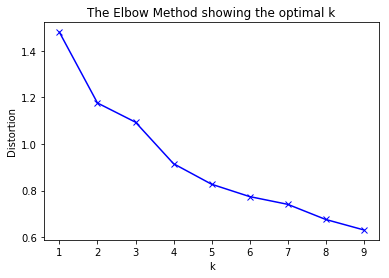

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clsr)
    kmeanModel.fit(df_clsr)
    distortions.append(sum(np.min(cdist(df_clsr, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clsr.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<span style='font-family:Helvetica'>Graph shows that 4 clusters is the optimal number.

In [44]:
# number of clusters
kclusters = 4

# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clsr)

# cluster labels generated for each row in the dataframe
kmeans.labels_[0:286]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 2, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3],
      dtype=int32)

<span style='font-family:Helvetica'>Inserting cluster labels column into dataset.

In [46]:
df_rms = df_rms.drop('Cluster Labels', axis = 1)
df_rms.insert(0, 'Cluster Labels', kmeans.labels_)
df_rms.head()

Cluster Labels    Zip      City County  EV_count  EVC_count  \
10759               0  98052   Redmond   King      1440         11   
7218                0  98033  Kirkland   King       922          9   
244                 0  98004  Bellevue   King       851         48   
1481                0  98006  Bellevue   King       832          5   
20226               0  98115   Seattle   King       820          5   

       Population  Density   Latitude  Longitude  
10759       58442  2907.83  47.677471 -122.12138  
7218        34338  3695.98  47.679030 -122.19340  
244         27946  3976.84  47.618371 -122.20308  
1481        36364  3401.89  47.562975 -122.15260  
20226       46206  7018.28  47.683820 -122.30122

<span style='font-family:Helvetica'>Creating map that represent clusters where radius of the circle marker is proportional to the numbwe of electric vehhicles in each zip code. 

In [47]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [48]:
# create map
map_clsr = folium.Map(location=[latitude, longitude], zoom_start=8)
colours = ['blue', 'red', 'green', 'grey']
# color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# markers to the map
markers_colors = []
for lat, lon, poi, cluster, EV_count in zip(df_rms['Latitude'], df_rms['Longitude'], df_rms['Zip'], df_rms['Cluster Labels'], df_clsr[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=EV_count*5+5,   
        popup=label,
        #color=rainbow[cluster-1],
        color=rainbow[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clsr)
       
map_clsr

<span style='font-family:Helvetica'>Scatterplot representing EV_count and Number of EV per 1000 people.

<IPython.core.display.Javascript object>


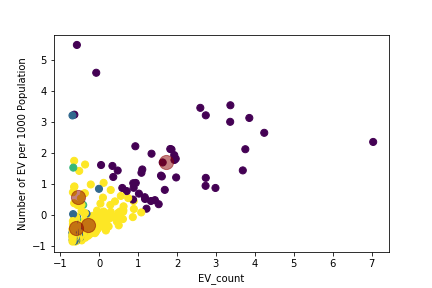

In [50]:
%matplotlib notebook
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(df_clsr)
plt.scatter(df_clsr[:, 0], df_clsr[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='darkred', s=200, alpha=0.5);
plt.xlabel('EV_count')
plt.ylabel('Number of EV per 1000 Population')
plt.show()

# Results

<span style='font-family:Helvetica'>Analysis shows that quantity and location of electric vehicles in the Washington state can be defined within 4 clusters. This clusters represents the concentration of EVs with regard to availability of charging stations, population and population density. Based on the results it is clear that cluster 1 is the most efficient option for EV service deployment. This cluster among other three, has the highest density of EVs and population on the relatively small geographic area. 

<span style='font-family:Helvetica'>Nevertheless, cluster 4 is the second by EV density but the largest, in terms of geographic size, which makes it less efficient option. 


 ### <span style='font-family:Helvetica'>Cluster 1

In [51]:
df_rms[(df_rms['Cluster Labels'] == 0)]

Cluster Labels    Zip               City     County  EV_count  \
10759               0  98052            Redmond       King      1440   
7218                0  98033           Kirkland       King       922   
244                 0  98004           Bellevue       King       851   
1481                0  98006           Bellevue       King       832   
20226               0  98115            Seattle       King       820   
9536                0  98040      Mercer Island       King       761   
14816               0  98074          Sammamish       King       760   
3416                0  98012            Bothell  Snohomish       690   
8140                0  98034           Kirkland       King       644   
15576               0  98075          Sammamish       King       644   
16773               0  98103            Seattle       King       643   
12199               0  98053            Redmond       King       618   
21347               0  98117            Seattle       King       503   
6354                0  98029           Issaquah       King       501   
2588                0  98008           Bellevue       King       495   
19251               0  98110  Bainbridge Island     Kitsap       494   
19745               0  98112            Seattle       King       481   
18776               0  98109            Seattle       King       475   
13498               0  98059             Renton       King       449   
14377               0  98072        Woodinville  Snohomish       439   
4608                0  98021            Bothell  Snohomish       435   
5624                0  98027           Issaquah       King       431   
17725               0  98105            Seattle       King       420   
33739               0  98501            Olympia   Thurston       402   
1095                0  98005           Bellevue       King       386   
23038               0  98125            Seattle       King       383   
21850               0  98118            Seattle       King       362   
24700               0  98155            Seattle       King       355   
22684               0  98122            Seattle       King       354   
25322               0  98177            Seattle       King       342   
25953               0  98199            Seattle       King       338   
24193               0  98144            Seattle       King       326   
18302               0  98107            Seattle       King       311   
17416               0  98104            Seattle       King       309   
21046               0  98116            Seattle       King       301   
6055                0  98028            Kenmore       King       299   
35666               0  98607              Camas      Clark       298   
22212               0  98119            Seattle       King       268   
4361                0  98020            Edmonds  Snohomish       247   
13947               0  98065         Snoqualmie       King       225   
22480               0  98121            Seattle       King       204   
14177               0  98070             Vashon       King       200   
28300               0  98250      Friday Harbor   San Juan       146   
9413                0  98039             Medina       King       123   
23970               0  98134            Seattle       King        31   
29607               0  98279               Olga   San Juan        19   

       EVC_count  Population   Density   Latitude   Longitude  
10759         11       58442   2907.83  47.677471 -122.121380  
7218           9       34338   3695.98  47.679030 -122.193400  
244           48       27946   3976.84  47.618371 -122.203080  
1481           5       36364   3401.89  47.562975 -122.152600  
20226          5       46206   7018.28  47.683820 -122.301220  
9536          14       22699   3591.24  47.569271 -122.232330  
14816          3       25748   2411.41  47.625364 -122.045347  
3416           8       51136   3337.63  47.843110 -122.204570  
8140           9       40407   4428.14  47.718

 ### <span style='font-family:Helvetica'>Cluster 2

In [52]:
df_rms[(df_rms['Cluster Labels'] == 1)]

Cluster Labels    Zip           City   County  EV_count  EVC_count  \
16397               1  98101        Seattle     King       136         39   
13171               1  98057         Renton     King        77         19   
25804               1  98188        Seattle     King        64         15   
114                 1  98002         Auburn     King        46          9   
39059               1  99224        Spokane  Spokane        41         10   
38388               1  99019   Liberty Lake  Spokane        36          6   
38593               1  99201        Spokane  Spokane        32         15   
3083                1  98010  Black Diamond     King        32          6   
38549               1  99163        Pullman  Whitman        30          5   
37967               1  98837     Moses Lake    Grant        27          5   
38625               1  99202        Spokane  Spokane        26          6   
32694               1  98402         Tacoma   Pierce        20          8   
30657               1  98327         Dupont   Pierce        20          3   
38052               1  98901         Yakima   Yakima        20          3   
38928               1  99216        Spokane  Spokane        19          4   
10741               1  98051     Ravensdale     King        18          3   
33299               1  98424         Tacoma   Pierce        17          3   
33173               1  98418         Tacoma   Pierce        16          7   
30677               1  98328     Eatonville   Pierce        15          3   
37999               1  98843         Orondo  Douglas        13          5   
38243               1  98942          Selah   Yakima        13          3   
33324               1  98443         Tacoma   Pierce        12          3   
35986               1  98625         Kalama  Cowlitz        12          2   
38970               1  99218        Spokane  Spokane        12          2   
10720               1  98047        Pacific     King        11          3   
36134               1  98640     Ocean Park  Pacific        11          2   
38018               1  98848         Quincy    Grant        11          2   
10731               1  98050        Preston     King        10          3   
37951               1  98831         Manson   Chelan        10          2   

       Population   Density   Latitude   Longitude  
16397       10238  19718.35  47.610670 -122.334380  
13171       10613   1741.84  47.432251 -121.803388  
25804       23111   3061.54  47.450321 -122.274720  
114         31647   4423.38  47.304221 -122.216020  
39059       18289    156.22  47.632573 -117.493260  
38388        9502    434.61  47.656171 -117.086280  
38593       13342   4445.30  47.663945 -117.431850  
3083         5025    333.78  47.317802 -122.014790  
38549       31404    151.71  46.732705 -117.186480  
37967       39722     82.26  47.133606 -119.284550  
38625       21580   3513.91  47.656692 -117.378990  
32694        6356   6748.42  47.247671 -122.439710  
30657        8267   1203.66  47.088719 -122.643260  
38052       30169    258.64  46.616199 -120.464810  
38928       24362   1824.44  47.665819 -117.216990  
10741        3270     64.00  47.359414 -121.886570  
33299       10140   1607.53  47.242186 -122.359160  
33173       10069   5981.88  47.066193 -122.113223  
30677       10433     49.23  46.884733 -122.292370  
37999        1817     27.72  47.745842 -120.093260  
38243       16973     90.10  46.726395 -120.569970  
33324        5371   1057.51  47.202874 -122.376780  
35986        6133     76.17  46.015873 -122.797180  
38970       15531   2123.94  47.751674 -117.412400  
10720        6339   2615.53  47.266190 -122.244630  
36134        4380    216.01  46.501781 -124.048010  
38018       11518     25.59  47.182270 -119.858680  
10731         322     97.34  47.536015 -121.931195  
37951        3708     78.99  47.915227 -120.129340

 ### <span style='font-family:Helvetica'>Cluster 3

In [53]:
df_rms[(df_rms['Cluster Labels'] == 2)]

Cluster Labels    Zip         City    County  EV_count  EVC_count  \
37882               2  98826  Leavenworth    Chelan        61          4   
38134               2  98922     Cle Elum  Kittitas        32          4   
38227               2  98940       Ronald  Kittitas        14          3   

       Population  Density   Latitude  Longitude  
37882        6504     6.40  47.728186 -120.73874  
38134        5468    12.23  47.193770 -120.91733  
38227         760     7.09  47.333940 -121.02979

 ### <span style='font-family:Helvetica'>Cluster 4

In [54]:
df_rms[(df_rms['Cluster Labels'] == 3)]

Cluster Labels    Zip           City        County  EV_count  \
23633               3  98133        Seattle          King       337   
5322                3  98026        Edmonds     Snohomish       302   
3115                3  98011        Bothell          King       301   
27040               3  98225     Bellingham       Whatcom       297   
2313                3  98007       Bellevue          King       275   
30114               3  98296      Snohomish     Snohomish       253   
9161                3  98038   Maple Valley          King       252   
12920               3  98056         Renton          King       251   
13248               3  98058         Renton          King       250   
16533               3  98102        Seattle          King       240   
27558               3  98229     Bellingham       Whatcom       237   
8784                3  98036       Lynnwood     Snohomish       236   
26552               3  98208        Everett     Snohomish       230   
34141               3  98502        Olympia      Thurston       228   
27337               3  98226     Bellingham       Whatcom       221   
23421               3  98126        Seattle          King       212   
29801               3  98290      Snohomish     Snohomish       211   
30900               3  98335     Gig Harbor        Pierce       192   
24001               3  98136        Seattle          King       192   
29336               3  98275       Mukilteo     Snohomish       190   
28509               3  98258   Lake Stevens     Snohomish       189   
10297               3  98042           Kent          King       182   
16220               3  98092         Auburn          King       177   
31802               3  98370        Poulsbo        Kitsap       172   
37413               3  98685      Vancouver         Clark       169   
36988               3  98682      Vancouver         Clark       169   
5086                3  98023    Federal Way          King       167   
18613               3  98108        Seattle          King       163   
4203                3  98019         Duvall          King       158   
37157               3  98683      Vancouver         Clark       158   
...               ...    ...            ...           ...       ...   
33414               3  98446         Tacoma        Pierce        18   
38726               3  99204        Spokane       Spokane        17   
28457               3  98252  Granite Falls     Snohomish        17   
28492               3  98257      La Conner        Skagit        17   
30095               3  98294         Sultan     Snohomish        17   
31266               3  98349        Lakebay        Pierce        17   
31287               3  98354         Milton          King        17   
38319               3  99005        Colbert       Spokane        17   
38487               3  99037       Veradale       Spokane        17   
35172               3  98563      Montesano  Grays Harbor        16   
37823               3  98815       Cashmere        Chelan        16   
32310               3  98380        Seabeck        Kitsap        15   
35126               3  98546      Grapeview         Mason        15   
39154               3  99320    Benton City        Benton        15   
35113               3  98541           Elma  Grays Harbor        13   
36259               3  98648      Stevenson      Skamania        13   
28804               3  98262   Lummi Island       Whatcom        12   
31151               3  98339   Port Hadlock     Jefferson        12   
31163               3  98340      Hansville        Kitsap        12   
35006               3  98524          Allyn         Mason        12   
35141               3  98548      Hoodsport         Mason        12   
36976               3  98675         Yacolt         Clark        12   
28037               3  98240         Custer       Whatcom        11   
28446               3  98251       Gold Bar     Snohomish        11   
31092               3  98337   

# <span style='font-family:Helvetica'>Discussion 

<span style='font-family:Helvetica'>Based on the performed analysis, we are able to identify the estimate location within the largest cluster of electric vehicles in the Washington state where EV service deployment would be the most efficient. However, an additional analysis would help to predict the potential customer growth. For instance, EV data analysis relatively to all other type of vehicles registered in Washington state for the past several years will help to reveal EV market dynamic in specific cluster. Therefore, this insight will help us to take more competent approach in the case of EV service facility deployment.

# <span style='font-family:Helvetica'>Conclusion  

<span style='font-family:Helvetica'>The data analysis was performed to identify the most optimal location for electric vehicle service in the Washington state. During the analysis we explored and analyzed some important statistical figures of each zip code in Washington state where any electrical vehicle registered as of May 2020. In addition, clustering analysis helped us to identify and highlight the groups of optimal zip codes. Eventually, cluster 3 which mostly situated within King County of Washington state chosen as the most optimal option for EV service that need more detailed analysis. 